## Abalone

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from time import gmtime, strftime
from pprint import pprint


### Load Data

In [2]:
abalone = pd.read_csv("inputs/abalone.txt",header=None)
abalone.columns = ['Sex','Length','Diameter','Height','WholeHeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings']
abalone = abalone.sample(frac=1).reset_index(drop=True)
abalone

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,I,0.460,0.360,0.105,0.4660,0.2225,0.0990,0.1100,7
1,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
2,F,0.550,0.470,0.150,0.8970,0.3770,0.1840,0.2900,9
3,F,0.650,0.510,0.175,1.3500,0.5750,0.3155,0.3885,10
4,M,0.420,0.340,0.125,0.4495,0.1650,0.1125,0.1440,11
5,I,0.555,0.425,0.145,0.7905,0.3485,0.1765,0.2250,9
6,F,0.615,0.475,0.170,1.0550,0.5430,0.2460,0.2345,9
7,M,0.650,0.515,0.175,1.4660,0.6770,0.3045,0.4000,10
8,F,0.505,0.410,0.150,0.6345,0.2430,0.1335,0.2150,17
9,F,0.440,0.350,0.125,0.4035,0.1750,0.0630,0.1290,9


### Filter  Data 

In [3]:
#get the number of rows and columns
r, c = abalone.shape

#get the list of columns
cols = abalone.columns
print(cols)

# Save training data and test data
# Extract only the values
ab_data = abalone.drop(['Sex'], axis = 1).values

# Extract Type of Avocado
ab_labels = abalone['Sex'].values

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeHeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings'],
      dtype='object')


#### Partition Data 

In [4]:
# Folds 
fold = 10

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#### Standardize Data

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()
ab_data_enc = sc.fit_transform(ab_data)

le = LabelEncoder()
ab_labels_enc = le.fit_transform(ab_labels)

In [6]:
print ab_data.shape

(4177, 8)


### Plotting Functions

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def plotScatter(title, filename, xlabel, ylabel, x_data, y_data, labels, color):
    # Graph Results :
    # - X axis: number of observations in training set
    # - Y axis: success rate of trained model
    
    plt.style.use('seaborn-whitegrid')
    
    # Plot Results
    fig, ax = plt.subplots()

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(x_data, y_data, c=labels, alpha=0.5, cmap=color, s=10) #jet # plt.cm.Set3

    plt.show()

    fig.savefig('outputs/abalone/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [9]:
def plotScatter3d(title, filename, xlabel, ylabel, zlabel, x_data, y_data, z_data, 
                  labels, color):
    # Graph Results :
    # - X axis: number of observations in training set
    # - Y axis: success rate of trained model
    
    plt.style.use('seaborn-whitegrid')
    
    # Plot Results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    ax.scatter(x_data, y_data, z_data, c=labels, alpha=0.5, s=5, cmap=color) #jet # plt.cm.Set3

    # rotate the axes and update
    
    ax.view_init(30, 0)
    plt.show()
    
    fig.savefig('outputs/abalone/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [10]:
def plotLinePlot(title, filename, xlabel, ylabel, x_data, y_data):
    # Graph Results :
    # - X axis: number of observations in training set
    # - Y axis: success rate of trained model
    plt.style.use('seaborn-whitegrid')

    # Plot Results
    fig, ax = plt.subplots()
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(x_data)))
    ax.yaxis.set_major_locator(plt.MaxNLocator(len(y_data)))
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(x_data, y_data, alpha=1.0) #jet

    plt.show()

    fig.savefig('outputs/abalone/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [11]:
def make_ellipses(gmm, ax, colors):
    ell_markers = []
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)#, label='Ellipse{}'.format(n+1))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(gmm.weights_[n])
        
        # create legend marker
        marker, = plt.plot([],[], marker="o", markersize=10, color=color, 
                          label="Ellipse Weight: {}".format(gmm.weights_[n]))
        ell_markers.append(ell)
        
        # plot ellipse and center
        ax.add_artist(ell)        
        ax.scatter(gmm.means_[n,0], gmm.means_[n,1], marker='x', color=color)
    # Add legend
    legend = ax.legend(loc='upper left', fontsize='x-large')
    ax.add_artist(legend)

In [12]:
def make_bar_plot(learner, ax, colors, num_clusters):
    ax.bar(range(1, num_clusters+1), learner.weights_, color=colors)
    ax.set_title('Weight Distribution for Components', fontsize=20)
    ax.set_xlabel('Components', fontsize='xx-large')
    ax.set_ylabel('Weight of Each Component', fontsize='xx-large')
    ax.xaxis.set_ticks(np.arange(1, num_clusters+1, 1))

In [13]:
def plot_em_covariances(title, filename, xlabel, ylabel, num_clusters, X, learner,
                        xlim, ylim):
    
    fig = plt.figure(figsize=(20,10))
    h = fig.add_subplot(121) #211
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, num_clusters, replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    print num_clusters
     
    learner = learner[num_clusters-1]
    predict = learner.fit_predict(X)
    
    # plot points
    for n, color in enumerate(colors):
        reduced_data = X[predict == n]
        print(reduced_data.shape)
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=1, color=color) # label=predict
    
    # plot covariances
    make_ellipses(learner, h, colors)
   
    h.set_title(title, fontsize=20)
    h.set_xlabel(xlabel, fontsize='xx-large')
    h.set_xlim(xlim[0],xlim[1])
    h.set_ylabel(ylabel, fontsize='xx-large')
    h.set_ylim(ylim[0],ylim[1]) # -1, 6
    
    # plot weight distribution
    i = fig.add_subplot(122) #212
    make_bar_plot(learner, i, colors, num_clusters)
    
    fig.savefig('outputs/abalone/em_cov_' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [263]:
def bar_plot_exp_var(title, filename, xlabel, ylabel, exp_var_ratios, num_clusters):
    fig = plt.figure()#figsize=(20,10))
    ax = fig.add_subplot(121)
    print num_clusters
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, num_clusters, replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    # set figure titles
    ax.set_title(title, fontsize='x-large')
    ax.set_xlabel(xlabel, fontsize='large')
    ax.xaxis.set_ticks(np.arange(1, num_clusters+1, 1))
    ax.set_ylabel(ylabel, fontsize='large')
    plt.yticks(np.arange(min(exp_var_ratios), max(exp_var_ratios)+1))
    ax.set_yscale('log')
    
    # plot bar plot
    ax.bar(range(1, num_clusters+1), exp_var_ratios, color=colors)
    ax.xaxis.set_ticks(np.arange(1, num_clusters+1, 1))

    fig.savefig('outputs/abalone/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

## Clustering
-  #### k-means clustering
    - Hard Clusters
-  #### Expectation Maximization
    - Soft Clusters

### __[K-Means Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__


In [15]:
from sklearn.cluster import KMeans

In [16]:
def run_kmeans(iter):
    km_learner = []
    # Run kmeans and record results
    for i in range(1,iter+1,1):
        print("clusters: "+str(i))

        # Run KNN with i neighbors
        kmeans = KMeans(n_clusters=i, random_state=0)
        
        km_learner.append(kmeans)
    return km_learner

In [17]:
%%time
# initialize prediction results
kmeans_score_success = []
kmeans_success = []
kmeans_cluster_means = []
kmeans_labels = []
kmeans_inertia = []
kmeans_learner = []

kmeans_learner = run_kmeans(10)

# run kmeans and record results
for i in range(0,len(kmeans_learner)):
    # fit the data
    print("clusters: " + str(i))
    kmeans_learner[i].fit(ab_data_enc,None)
    kmeans_score_success.append(kmeans_learner[i].score(ab_data_enc,None))
    
    # append means (n_components(i), n_features(dataset))
    kmeans_cluster_means.append(kmeans_learner[i].cluster_centers_)
    kmeans_labels.append(kmeans_learner[i].labels_)
    kmeans_inertia.append(kmeans_learner[i].inertia_)
    
    # fit data with Cross-Validation
    scores = cross_val_score(kmeans_learner[i], ab_data_enc, None, cv=fold)
    kmeans_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
clusters: 10
clusters: 0
clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
CPU times: user 1min 15s, sys: 4.28 s, total: 1min 19s
Wall time: 26.2 s


In [18]:
# Check means to determine clusters to plot
for i in range(0,len(kmeans_cluster_means)):
    print "num clusters: " + str(i+1)
    for j in range(0,len(kmeans_cluster_means[i])):
        np_kmeans = np.array(kmeans_cluster_means[i][j])
        index_max = np.argmax(np_kmeans)
        print "max idx: " + str(index_max + 1)
#         pprint(kmeans_cluster_means[i][j])

num clusters: 1
max idx: 3
num clusters: 2
max idx: 8
max idx: 4
num clusters: 3
max idx: 8
max idx: 8
max idx: 4
num clusters: 4
max idx: 8
max idx: 4
max idx: 8
max idx: 2
num clusters: 5
max idx: 8
max idx: 4
max idx: 8
max idx: 8
max idx: 1
num clusters: 6
max idx: 5
max idx: 8
max idx: 1
max idx: 4
max idx: 8
max idx: 8
num clusters: 7
max idx: 8
max idx: 5
max idx: 4
max idx: 8
max idx: 1
max idx: 8
max idx: 8
num clusters: 8
max idx: 8
max idx: 5
max idx: 2
max idx: 8
max idx: 4
max idx: 3
max idx: 8
max idx: 8
num clusters: 9
max idx: 5
max idx: 8
max idx: 8
max idx: 8
max idx: 5
max idx: 8
max idx: 1
max idx: 8
max idx: 3
num clusters: 10
max idx: 8
max idx: 1
max idx: 5
max idx: 1
max idx: 3
max idx: 8
max idx: 8
max idx: 8
max idx: 5
max idx: 6


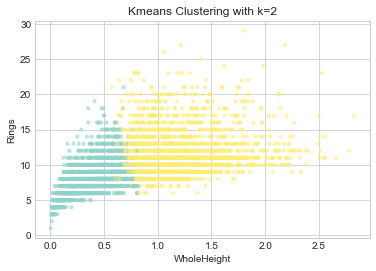

In [19]:
plotScatter('Kmeans Clustering with k=2', 'km_2_0', 
            cols[4], cols[8], abalone[cols[4]], abalone[cols[8]], 
            kmeans_labels[1], plt.cm.Set3)

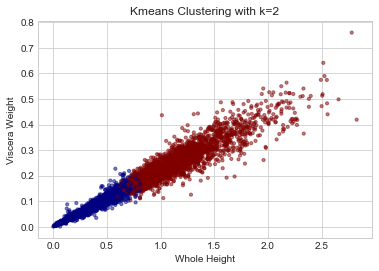

In [20]:
plotScatter('Kmeans Clustering with k=2', 'km_2_1', 
            'Whole Height', "Viscera Weight", abalone['WholeHeight'], abalone["VisceraWeight"], 
            kmeans_labels[1], plt.cm.jet)

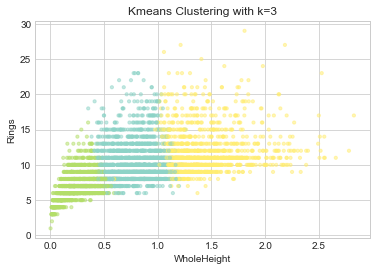

In [21]:
plotScatter('Kmeans Clustering with k=3', 'km_3_0', 
            cols[4], cols[8], abalone[cols[4]], abalone[cols[8]], 
            kmeans_labels[2], plt.cm.Set3)

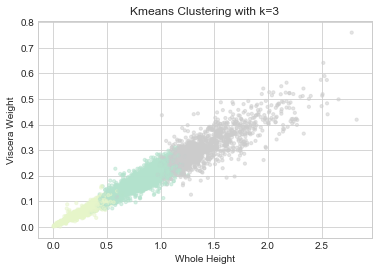

In [39]:
plotScatter('Kmeans Clustering with k=3', 'km_3_1', 
            'Whole Height', "Viscera Weight", abalone['WholeHeight'], abalone["VisceraWeight"], 
            kmeans_labels[2], plt.cm.Pastel2)

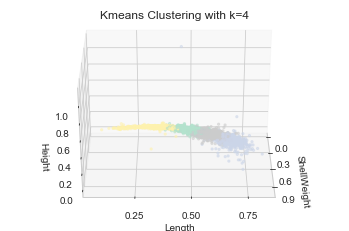

In [38]:
plotScatter3d('Kmeans Clustering with k=4', 'km_4_0', 
            cols[7], cols[1], cols[3], 
            abalone[cols[7]], abalone[cols[1]], abalone[cols[3]], 
            kmeans_labels[3], plt.cm.Pastel2)

Index([u'Sex', u'Length', u'Diameter', u'Height', u'WholeHeight',
       u'ShuckedWeight', u'VisceraWeight', u'ShellWeight', u'Rings'],
      dtype='object')

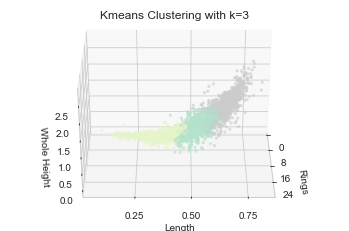

In [45]:
plotScatter3d('Kmeans Clustering with k=3', 'km_3_1', 
            cols[8], 'Length', 'Whole Height', 
            abalone[cols[8]], abalone[cols[1]], abalone[cols[4]], 
            kmeans_labels[2], plt.cm.Pastel2)

- explanations of your methods: How did you choose k?
- a description of the kind of clusters that you got.
- analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) did the clusters line up with the labels? Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explictly.

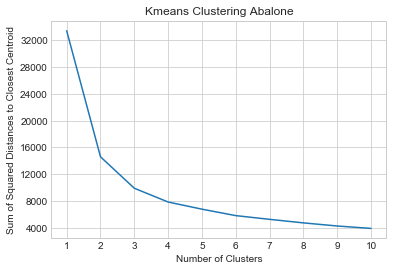

In [27]:
plotLinePlot('Kmeans Clustering Abalone', 'km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid', 
             range(1,11,1), kmeans_inertia)

### __[Expectation Maximization](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__
- soft clusters


In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
def run_expectation_max(iter):
    EM_learner = []
    # Run Expectation Maximization and record results
    for i in range(1,iter+1,1):
        print("clusters: "+str(i))

        # Run Expectation Maximization
        em = GaussianMixture(n_components=i, covariance_type='full', random_state=0)

        EM_learner.append(em)
    return EM_learner

In [31]:
%%time
# Initialize prediction results
EM_score_success = []
EM_success = []
EM_weights = []
EM_means = []
EM_covariances = []
EM_converged = []
EM_precision = []
EM_Y_ = []

cov_type=['full','tied','diag','spherical']

# run learner
em = run_expectation_max(10)
EM_learner = em  
for i in range(0,len(em)):
    # fit the data
    print("components: " + str(i))
    em[i].fit(ab_data_enc,None)
    EM_score_success.append(em[i].score(ab_data_enc,None)) #avocado_enc

    # append means (n_components(i), n_features(dataset))
    EM_means.append(em[i].means_)
    EM_covariances.append(em[i].covariances_) # n_components
    EM_converged.append(em[i].converged_)
    EM_precision.append(em[i].precisions_)
    EM_weights.append(em[i].weights_) # n_components
    EM_Y_.append(em[i].predict(ab_data_enc))

    # fit data with Cross-Validation
    scores = cross_val_score(em[i], ab_data_enc, None, cv=fold)
    EM_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
clusters: 10
components: 0
components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
components: 7
components: 8
components: 9
CPU times: user 55.9 s, sys: 2.48 s, total: 58.3 s
Wall time: 15.4 s


3
(2412, 8)
(675, 8)
(1090, 8)


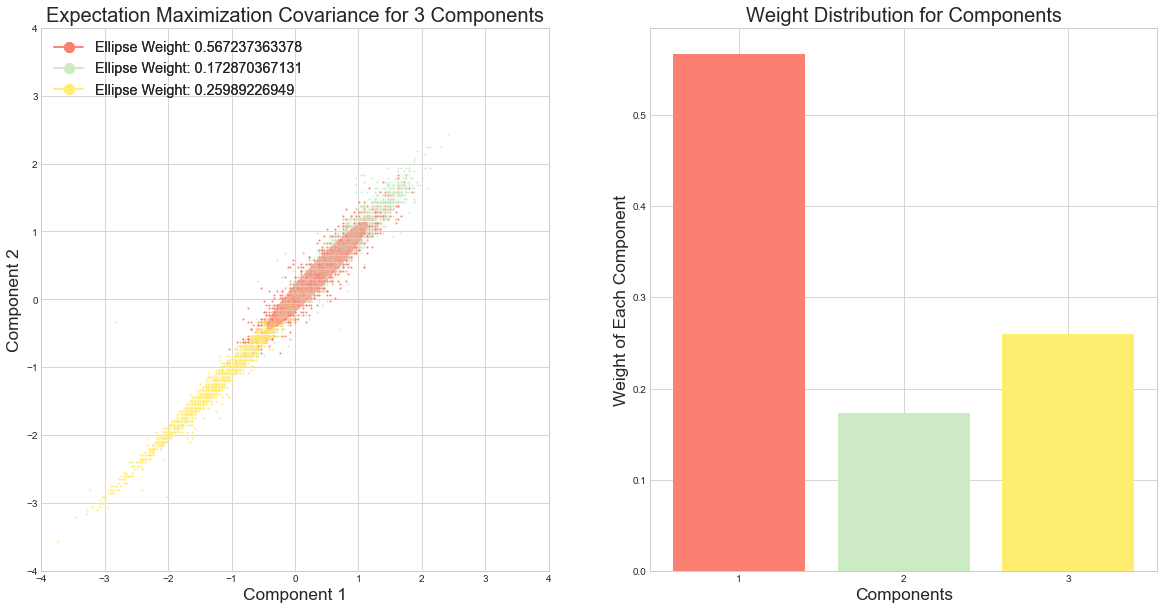

In [51]:
plot_em_covariances('Expectation Maximization Covariance for 3 Components', '3', 
                    'Component 1', 'Component 2', 3, ab_data_enc, EM_learner,[-4,4],[-4,4])

2
(1910, 8)
(2267, 8)


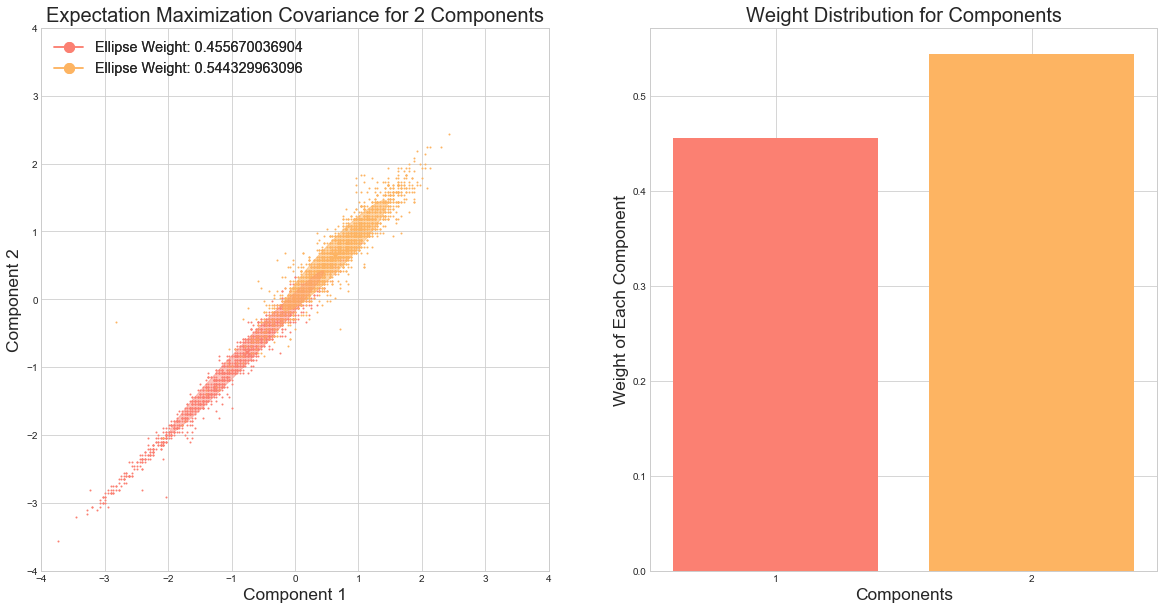

In [53]:
plot_em_covariances('Expectation Maximization Covariance for 2 Components', '2', 'Component 1', 
                    'Component 2', 2, ab_data_enc, EM_learner,[-4,4],[-4,4])

##### Redundancy helps us know how our principal components are related.
We can best view redudancy by visualizing the covariances as shown above. If the two components are entirely uncorrelated the variance will have a high spread and a large circle. 
If the components are strongly correlated the circle will be very slender and have a smaller variance. In the picture above component the gray component shows less redundancy than the purple component.

In [54]:
EM_converged

[True, True, True, True, True, True, True, True, True, True]

## Dimensionality reduction algorithms
- #### PCA - Principal Component Analysis
- #### ICA - Independent Component Analysis
- #### RPA - Randomized Projection Analysis
- #### LDA - L Discriminant Analysis

In [55]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.random_projection import GaussianRandomProjection

### __[ PCA - Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)__
- PCA 
- Kmeans after PCA
- EM after PCA

In [56]:
# Choosing k for kmeans...based on richness, scale invariability, and consistency

### I.) PCA

In [73]:
%%time
# initialize prediction results
PCA_score_success = []
PCA_success = []

PCA_covariances = []
PCA_means = []
PCA_e_v_ratio = []
PCA_noise_var = []
PCA_learner = []
avocado_PCA = []
# Run PCA and record results
for i in range(1,7,1):
    print("clusters: "+str(i))

    # fit the data
    pca = PCA(n_components=i, random_state=0)
    pca.fit(ab_data_enc)
    
    PCA_learner.append(pca)
    PCA_score_success.append(pca.score(ab_data_enc))
    PCA_covariances.append(pca.get_covariance())
    PCA_e_v_ratio.append(pca.explained_variance_ratio_)
    PCA_noise_var.append(pca.noise_variance_)

    avocado_PCA.append(pca.fit_transform(ab_data_enc))
    # fit data with Cross-Validation
    scores = cross_val_score(pca, ab_data_enc, None, cv=fold)
    PCA_success.append(scores.mean())
    

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 1.56 s, sys: 123 ms, total: 1.68 s
Wall time: 444 ms


In [249]:
pca_components = pd.DataFrame(PCA_learner[3].components_)

In [257]:
cols[1:]

Index([u'Length', u'Diameter', u'Height', u'WholeHeight', u'ShuckedWeight',
       u'VisceraWeight', u'ShellWeight', u'Rings'],
      dtype='object')

In [258]:
pca_components.columns = cols[1:]

In [259]:
pca_components

,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.372139,0.373094,0.340027,0.378307,0.362454,0.368558,0.370758,0.242713
1,-0.068283,-0.040048,0.070463,-0.137346,-0.298840,-0.172979,0.045400,0.921204
2,0.031070,0.041005,0.899706,-0.206194,-0.208286,-0.197380,-0.161574,-0.192144
3,-0.604054,-0.587595,0.256777,0.241849,0.183246,0.265221,0.244192,0.043310


In [58]:
PCA_e_v_ratio 

[array([0.83905489]),
 array([0.83905489, 0.08695162]),
 array([0.83905489, 0.08695162, 0.03230539]),
 array([0.83905489, 0.08695162, 0.03230539, 0.02074873])]

4


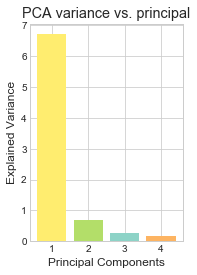

In [59]:
# percentage of variances vs. principal components
PCA_variances = [PCA_learner[i].explained_variance_ for i in range(4)]

bar_plot_exp_var('PCA variance vs. principal', 'pca_exp_var', 
             'Principal Components', 'Explained Variance',
            PCA_variances[3],4)

##### optimal number of components is determined visually through scree plot.
It does not make sense to go past the 2nd component due to the law of diminishing marginal returns and the variance isn't shifting much thereafter.

4


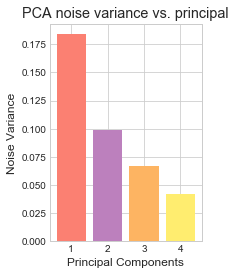

In [60]:
# percentage of noise variance vs. principal components
bar_plot_exp_var('PCA noise variance vs. principal', 'pca_noise_var', 
             'Principal Components', 'Noise Variance',
             PCA_noise_var, 4)

##### Noise covariance of the PCA model. It is important for noise to be low.
We can check how precise our data is with the plot below: 



In [61]:
[(PCA_learner[3].explained_variance_[i]/PCA_noise_var[i]) for i in range(4)]

[36.49309007973137, 7.050752144423068, 3.874654130322646, 3.9635835201474743]

4


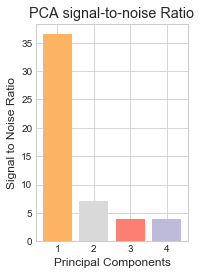

In [62]:
# percentage of noise variance vs. principal components
cluster_i = 3
PCA_SNR = [(PCA_learner[cluster_i].explained_variance_[i]/PCA_noise_var[i]) for i in range(cluster_i+1)]

bar_plot_exp_var('PCA signal-to-noise Ratio', 'pca_snr', 
             'Principal Components', 'Signal to Noise Ratio',
            PCA_SNR, 4)

##### Signal to noise ratio helps indicate the precision of the data.
A high SNR that is much greater than one will indicate high precision data. In our case even for four components the SNR was high.
If our SNR had been low then it would have meant that our data was noise contaminated.

4


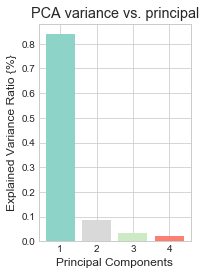

In [63]:
# percentage of explained variance ratio vs. principal components
bar_plot_exp_var('PCA variance vs. principal', 'pca_exp_var_rat', 
             'Principal Components', 'Explained Variance Ratio {%}',
              PCA_e_v_ratio[3], 4)

##### Percentage of variance explained by each of the selected components
This is the percentage explained for 3 components

### II.) Kmeans after PCA

In [74]:
%%time
# Initialize prediction results
km_pca_cm = []
km_pca_i = []
km_pca_l = []
km_pca_s = []
km_pca_ss = []

# run learner
km_pca_learner = run_kmeans(6)

# run kmeans and record results
for i in range(0,len(km_pca_learner)):
    print("components: " + str(i+1))

    # fit the data
    km_pca_learner[i].fit(avocado_PCA[i],None)
    km_pca_ss.append(km_pca_learner[i].score(avocado_PCA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_pca_cm.append(km_pca_learner[i].cluster_centers_)
    km_pca_i.append(km_pca_learner[i].inertia_)
    km_pca_l.append(km_pca_learner[i].labels_)

    # Fit data with Cross-Validation
    scores = cross_val_score(km_pca_learner[i], avocado_PCA[i], None, cv=fold)
    km_pca_s.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
CPU times: user 28.2 s, sys: 1.65 s, total: 29.9 s
Wall time: 8.17 s


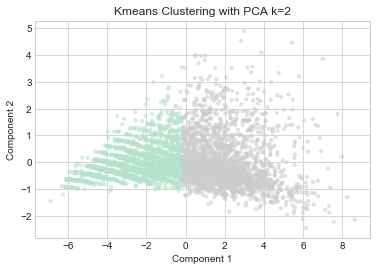

In [75]:
plotScatter('Kmeans Clustering with PCA k=2', 'pca_km_2', 'Component 1', 
            'Component 2', avocado_PCA[1][:,0], avocado_PCA[1][:,1], km_pca_l[1], plt.cm.Pastel2)

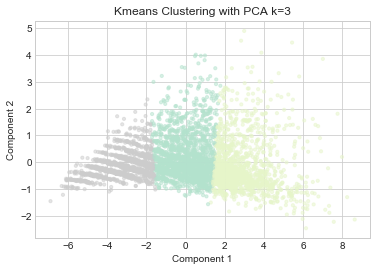

In [76]:
plotScatter('Kmeans Clustering with PCA k=3', 'pca_km_3', 'Component 1', 
            'Component 2', avocado_PCA[2][:,0], avocado_PCA[2][:,1], km_pca_l[2], plt.cm.Pastel2)

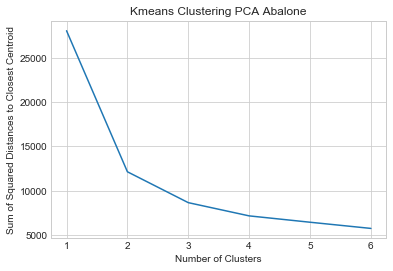

In [134]:
plotLinePlot('Kmeans Clustering PCA Abalone', 'pca_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,7,1), km_pca_i)

#### EM after PCA

In [79]:
%%time
# initialize arrays
em_pca_converged = []
em_pca_covariances = []
em_pca_means = []
em_pca_precision = []
em_pca_success = []
em_pca_ss = []
em_pca_weights = []
em_pca_Y_ = []


# run learner
em_pca_learner = run_expectation_max(6)

for i in range(0, len(em_pca_learner)):
    # fit the data
    em_pca_learner[i].fit(avocado_PCA[i],None)
    em_pca_ss.append(em_pca_learner[i].score(avocado_PCA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_pca_converged.append(em_pca_learner[i].converged_)
    em_pca_covariances.append(em_pca_learner[i].covariances_) # n_components
    em_pca_means.append(em_pca_learner[i].means_)
    em_pca_precision.append(em_pca_learner[i].precisions_)
    em_pca_weights.append(em_pca_learner[i].weights_) # n_components
    em_pca_Y_.append(em_pca_learner[i].predict(avocado_PCA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_pca_learner[i], avocado_PCA[i], None, cv=fold)
    em_pca_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 17.7 s, sys: 851 ms, total: 18.5 s
Wall time: 4.82 s


2
(2787, 2)
(1390, 2)


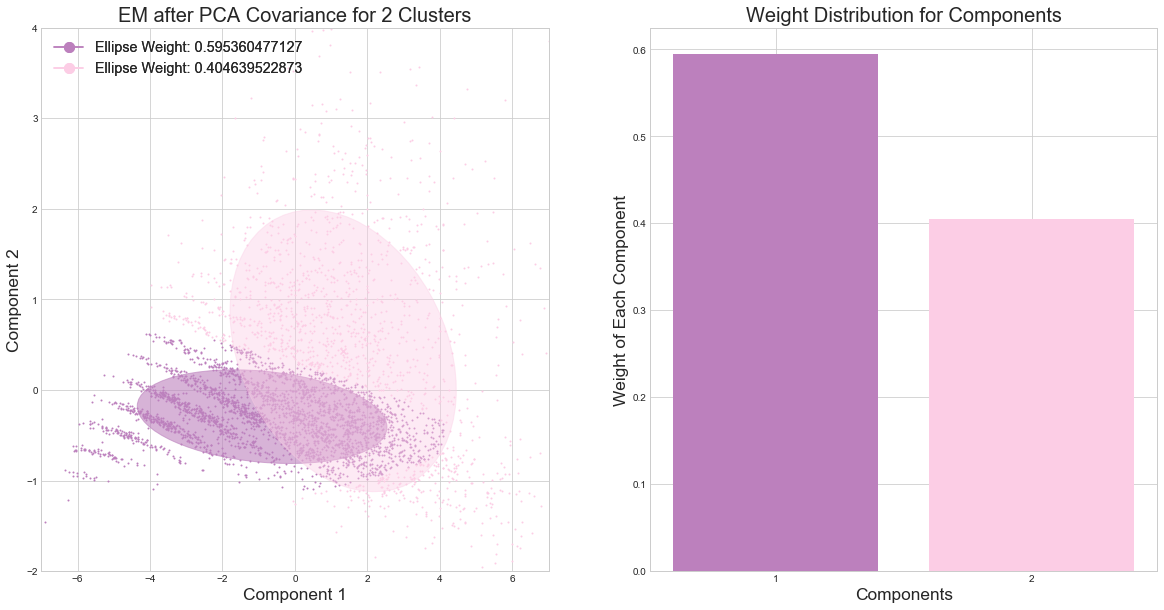

In [87]:
plot_em_covariances('EM after PCA Covariance for 2 Clusters', '2_pca', 'Component 1', 
                    'Component 2', 2, avocado_PCA[1], em_pca_learner, [-7,7], [-2,4])

3
(2545, 3)
(435, 3)
(1197, 3)


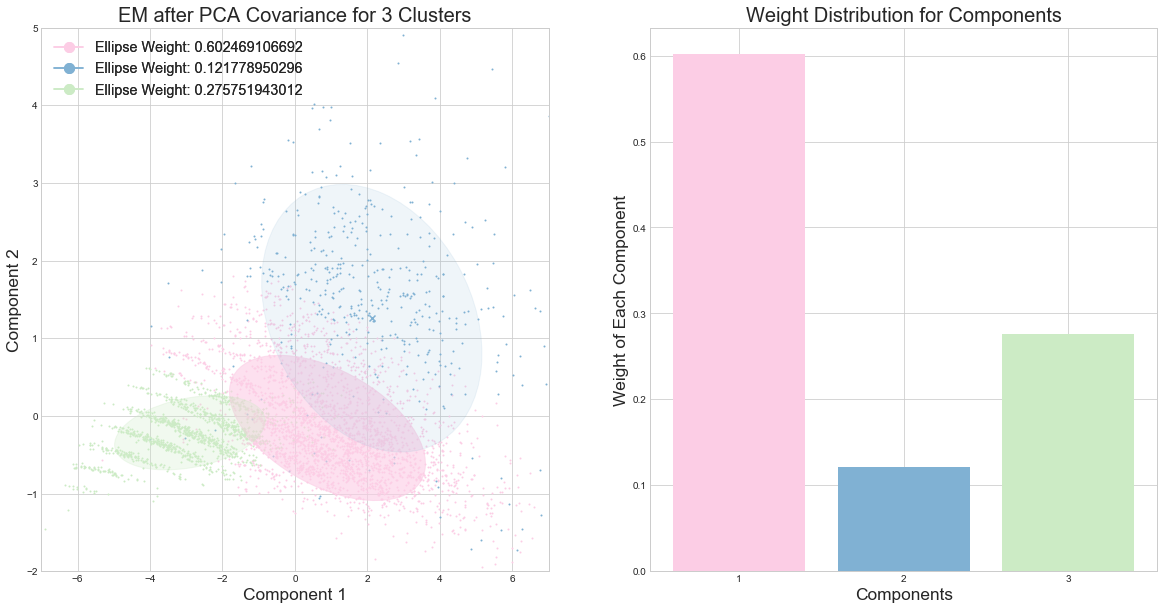

In [92]:
plot_em_covariances('EM after PCA Covariance for 3 Clusters', '3_pca', 'Component 1', 
                    'Component 2', 3, avocado_PCA[2], em_pca_learner, [-7,7], [-2,5])

In [93]:
em_pca_converged

[True, True, True, True, True, True]

### __[ ICA - Independent Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)__
- is a recently developed method in which the goal is to find a linear representation of nongaussian data so that the components are statistically independent, or as independent as possible

#### ICA

In [95]:
%%time
# Initialize prediction results
ICA_success = []
ICA_unmixing = []
ICA_mixing = []
avocado_ICA = []
ICA_kurtosis = []

# Run ICA and record results
for i in range(1,8,1):
    print("clusters: "+str(i))

    # Fit the data
    ica = FastICA(n_components=i, random_state=0)
    ica.fit(ab_data_enc)
    avocado_ICA.append(ica.fit_transform(ab_data_enc))

    ICA_unmixing.append(ica.components_)
    ICA_mixing.append(ica.mixing_)

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
CPU times: user 438 ms, sys: 34 ms, total: 472 ms
Wall time: 125 ms


7


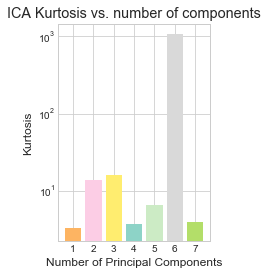

In [264]:
# percentage of explained variance ratio vs. principal components
bar_plot_exp_var('ICA Kurtosis vs. number of components', 'ica_kurt', 
             'Number of Principal Components', 'Kurtosis',
              scipy.stats.kurtosis(avocado_ICA[6]),7)

In [97]:
import scipy.stats
pprint(scipy.stats.kurtosis(ab_data_enc))

array([ 6.31075527e-02, -4.68572578e-02,  7.59330987e+01, -2.50513056e-02,
        5.92975442e-01,  8.24751242e-02,  5.29853513e-01,  2.32646236e+00])


##### __[Kurtosis](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.kurtosis.html)__  can be both positive or negative. Random variables that have a negative kurtosis are called subgaussian, and those with positive kurtosis are called supergaussian.
    - subgaussian-uniform
    - supergaussian-really spiky top
Typically nongaussianity is measured by the absolute value of kurtosis. The square of kurtosis can also be
used. These are zero for a gaussian variable, and greater than zero for most nongaussian random variables. There
are nongaussian random variables that have zero kurtosis, but they can be considered as very rare.
+ However, kurtosis has also some drawbacks in practice, when its value has to be estimated from a measured
sample. The main problem is that kurtosis can be very sensitive to outliers (Huber, 1985). Its value may depend on
only a few observations in the tails of the distribution, which may be erroneous or irrelevant observations. In other
words, kurtosis is not a robust measure of nongaussianity.



#### kmeans after ICA

In [99]:
%%time
# Initialize prediction results
km_ica_ss = []
km_ica_s = []
km_ica_cm = []
km_ica_l = []
km_ica_i = []

# run learner
km_ica_learner = run_kmeans(6)

# run kmeans and record results
for i in range(0,len(km_ica_learner)):
    # fit the data
    km_ica_learner[i].fit(avocado_ICA[i],None)
    km_ica_ss.append(km_ica_learner[i].score(avocado_ICA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_ica_cm.append(km_ica_learner[i].cluster_centers_)
    km_ica_i.append(km_ica_learner[i].inertia_)
    km_ica_l.append(km_ica_learner[i].labels_)

    # fit data with Cross-Validation
    scores = cross_val_score(km_ica_learner[i], avocado_ICA[i], None, cv=fold)
    km_ica_s.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 26.3 s, sys: 1.59 s, total: 27.9 s
Wall time: 7.7 s


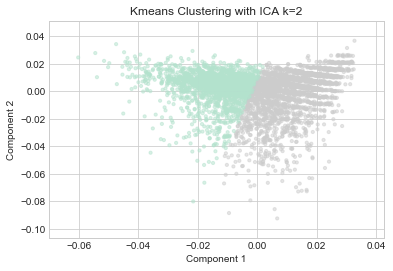

In [126]:
plotScatter('Kmeans Clustering with ICA k=2', 'ica_km_2', 'Component 1', 
            'Component 2', avocado_ICA[1][:,0], avocado_ICA[1][:,1], km_ica_l[1], plt.cm.Pastel2_r)

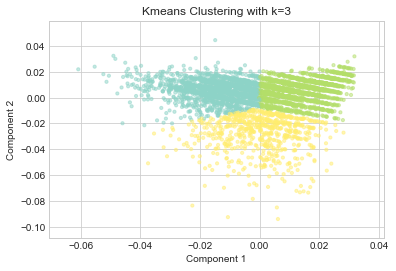

In [124]:
plotScatter('Kmeans Clustering with k=3', 'ica_km_3', 'Component 1', 'Component 2', 
            avocado_ICA[2][:,1], avocado_ICA[2][:,2], km_ica_l[2], plt.cm.Set3)

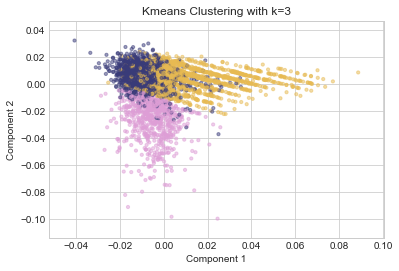

In [135]:
plotScatter('Kmeans Clustering with k=3', 'ica_km_3_1', 'Component 1', 
            'Component 2', avocado_ICA[3][:,0], avocado_ICA[3][:,1], km_ica_l[2], plt.cm.tab20b)

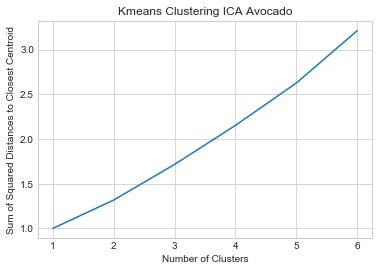

In [130]:
plotLinePlot('Kmeans Clustering ICA Avocado', 'ica_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,7,1), km_ica_i)

#### EM after ICA

In [136]:
%%time
# initialize arrays
em_ica_converged = []
em_ica_covariances = []
em_ica_means = []
em_ica_precision = []
em_ica_success = []
em_ica_ss = []
em_ica_weights = []
em_ica_Y_ = []

# run learner
em_ica_learner = run_expectation_max(6)

for i in range(0,len(em_ica_learner)):
    # fit the data
    em_ica_learner[i].fit(avocado_ICA[i],None)
    em_ica_ss.append(em_ica_learner[i].score(avocado_ICA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_ica_converged.append(em_ica_learner[i].converged_)
    em_ica_covariances.append(em_ica_learner[i].covariances_) # n_components
    em_ica_means.append(em_ica_learner[i].means_)
    em_ica_precision.append(em_ica_learner[i].precisions_)
    em_ica_weights.append(em_ica_learner[i].weights_) # n_components
    em_ica_Y_.append(em_ica_learner[i].predict(avocado_ICA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_ica_learner[i], avocado_ICA[i], None, cv=fold)
    em_ica_success.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 20.1 s, sys: 873 ms, total: 20.9 s
Wall time: 5.49 s


2
(1303, 2)
(2874, 2)


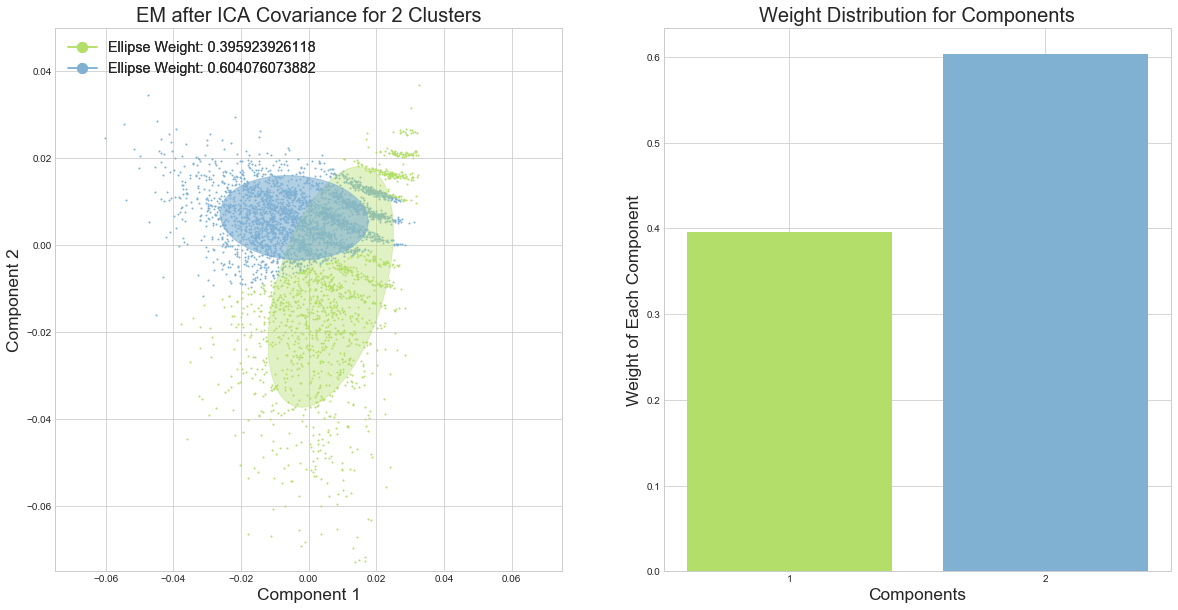

In [142]:
plot_em_covariances('EM after ICA Covariance for 2 Clusters', '2_ica', 'Component 1', 
                    'Component 2', 2, avocado_ICA[1], em_ica_learner, [-.075,.075], [-.075,.05])

3
(1383, 3)
(2772, 3)
(22, 3)


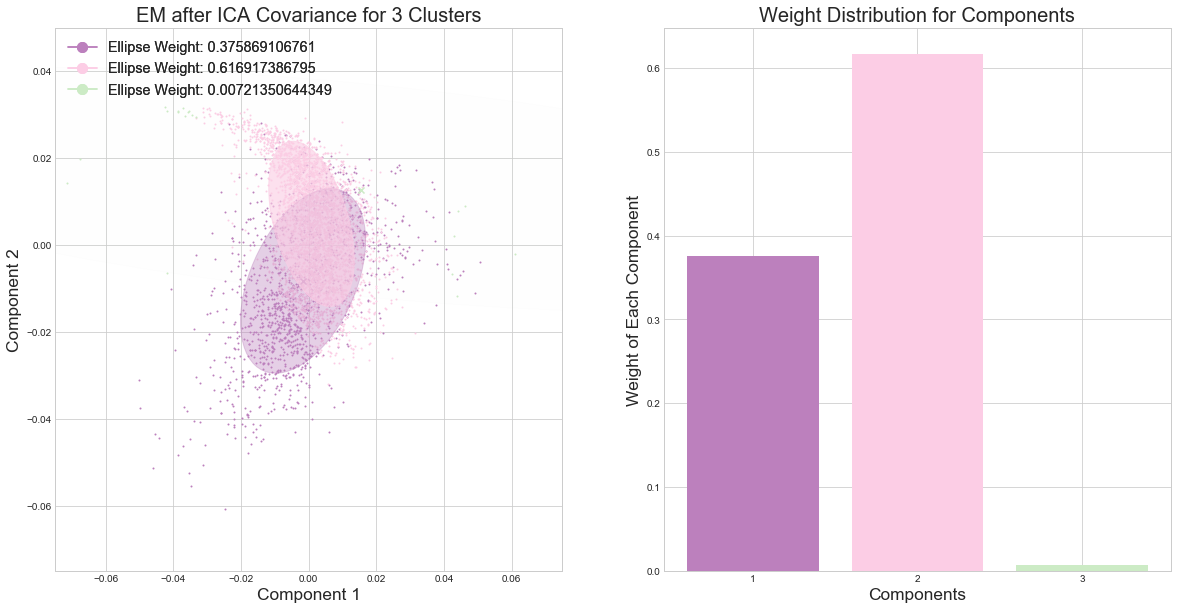

In [144]:
plot_em_covariances('EM after ICA Covariance for 3 Clusters', '3_ica', 'Component 1', 
                    'Component 2', 3, avocado_ICA[2], em_ica_learner, [-.075,.075], [-.075,.05])

4
(882, 4)
(1036, 4)
(114, 4)
(2145, 4)


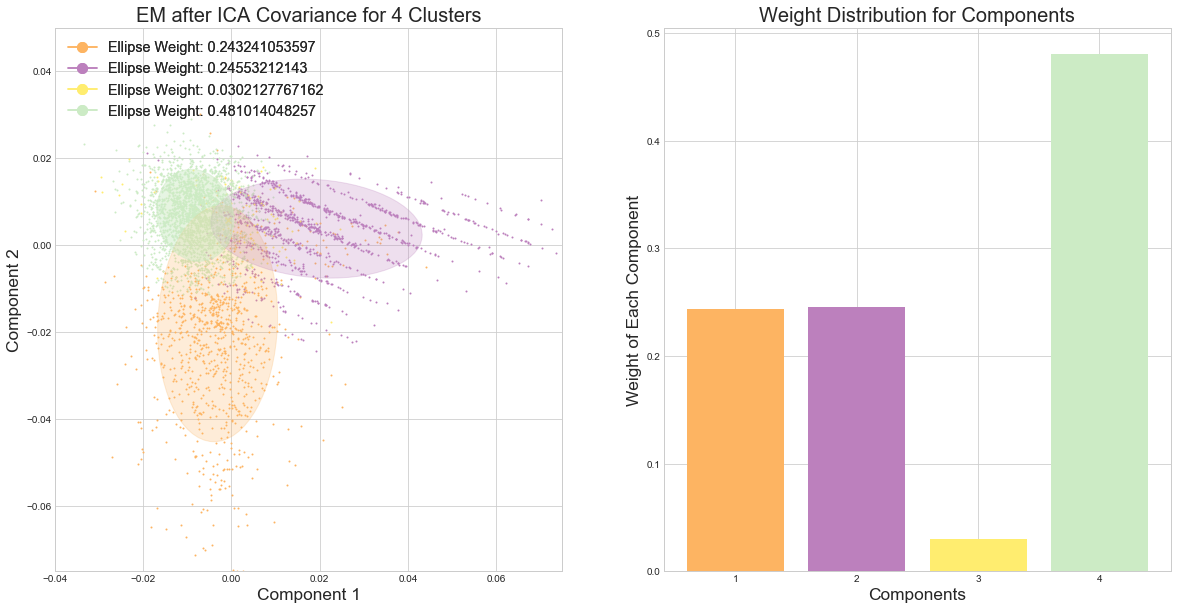

In [149]:
plot_em_covariances('EM after ICA Covariance for 4 Clusters', '4_ica', 'Component 1', 
                    'Component 2', 4, avocado_ICA[3], em_ica_learner, [-.04,.075], [-.075,.05])

In [158]:
em_ica_converged

[True, True, True, True, True, True]

### __[ RPA - Randomized Projections Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.random_projection)__

#### RPA

In [161]:
%%time
# Initialize prediction results
RPA_components = []
RPA_density = []
RPA_mean = []

avocado_RPA = []

for i in range(1,7,1):
    # run RPA
    print("components: "+str(i))
    rpa = SparseRandomProjection(n_components=i, random_state=0)
    avocado_RPA.append(rpa.fit_transform(ab_data_enc))
    RPA_components.append(rpa.components_)
    RPA_density.append(rpa.density_)
    RPA_mean.append(np.mean(rpa.components_ != 0))

components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
CPU times: user 14.1 ms, sys: 2.23 ms, total: 16.4 ms
Wall time: 14.6 ms


In [162]:
# if the mean is low it means very few components are non-zero
RPA_mean

[0.375, 0.375, 0.41666666666666663, 0.375, 0.4, 0.3958333333333333]

In [163]:
RPA_density

[0.35355339059327373,
 0.35355339059327373,
 0.35355339059327373,
 0.35355339059327373,
 0.35355339059327373,
 0.35355339059327373]

#### kmeans after RPA

In [165]:
%%time
# Initialize prediction results
km_rpa_ss = []
km_rpa_s = []
km_rpa_cm = []
km_rpa_l = []
km_rpa_i = []

# run learner
km_rpa_learner = run_kmeans(6)

# run kmeans and record results
for i in range(0,len(km_rpa_learner)):
    # fit the data
    km_rpa_learner[i].fit(avocado_RPA[i],None)
    km_rpa_ss.append(km_rpa_learner[i].score(avocado_RPA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_rpa_cm.append(km_rpa_learner[i].cluster_centers_)
    km_rpa_i.append(km_rpa_learner[i].inertia_)
    km_rpa_l.append(km_rpa_learner[i].labels_)


    # fit data with Cross-Validation
    scores = cross_val_score(km_rpa_learner[i], avocado_RPA[i], None, cv=fold)
    km_rpa_s.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 27.3 s, sys: 1.44 s, total: 28.8 s
Wall time: 7.71 s


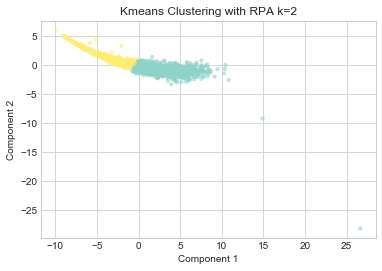

In [173]:
plotScatter('Kmeans Clustering with RPA k=2', 'rpa_km_2', 'Component 1', 
            'Component 2', avocado_RPA[1][:,0], avocado_RPA[1][:,1], km_rpa_l[1], plt.cm.Set3)

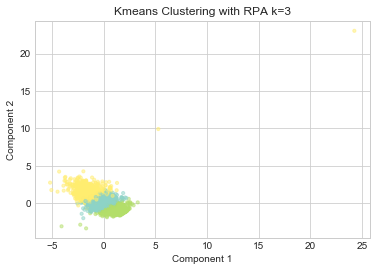

In [174]:
plotScatter('Kmeans Clustering with RPA k=3', 'rpa_km_3', 'Component 1', 
            'Component 2', avocado_RPA[2][:,0], avocado_RPA[2][:,1], km_rpa_l[2], plt.cm.Set3)

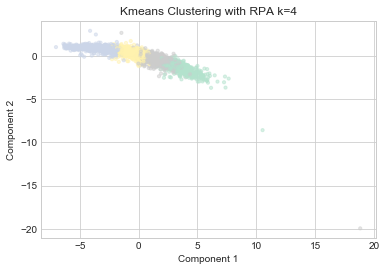

In [172]:
plotScatter('Kmeans Clustering with RPA k=4', 'rpa_km_4', 'Component 1', 
            'Component 2', avocado_RPA[3][:,0], avocado_RPA[3][:,1], km_rpa_l[3], plt.cm.Pastel2)

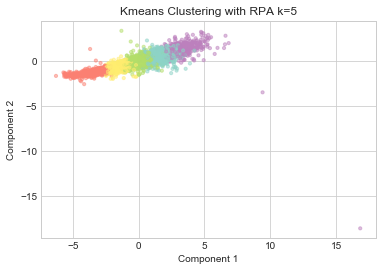

In [176]:
plotScatter('Kmeans Clustering with RPA k=5', 'rpa_km_5', 'Component 1', 
            'Component 2', avocado_RPA[4][:,0], avocado_RPA[4][:,1], km_rpa_l[4], plt.cm.Set3)

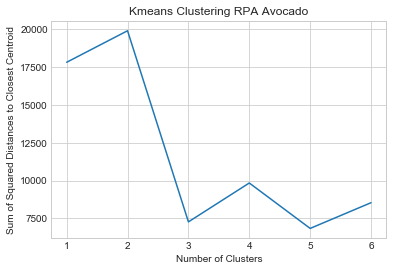

In [170]:
plotLinePlot('Kmeans Clustering RPA Avocado', 'rpa_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,7,1), km_rpa_i)

#### EM after RPA

In [177]:
%%time
# initialize arrays
em_rpa_converged = []
em_rpa_covariances = []
em_rpa_means = []
em_rpa_precision = []
em_rpa_success = []
em_rpa_ss = []
em_rpa_weights = []
em_rpa_Y_ = []

# run learner
em_rpa_learner = run_expectation_max(6)

for i in range(0,len(em_rpa_learner)):
    # print the data
    print("component: " + str(i))
    em_rpa_learner[i].fit(avocado_RPA[i],None)
    em_rpa_ss.append(em_rpa_learner[i].score(avocado_RPA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_rpa_converged.append(em_rpa_learner[i].converged_)
    em_rpa_covariances.append(em_rpa_learner[i].covariances_) # n_components
    em_rpa_means.append(em_rpa_learner[i].means_)
    em_rpa_precision.append(em_rpa_learner[i].precisions_)
    em_rpa_weights.append(em_rpa_learner[i].weights_) # n_components
    em_rpa_Y_.append(em_rpa_learner[i].predict(avocado_RPA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_rpa_learner[i], avocado_RPA[i], None, cv=fold)
    em_rpa_success.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
component: 0
component: 1
component: 2
component: 3
component: 4
component: 5
CPU times: user 19.7 s, sys: 1.22 s, total: 20.9 s
Wall time: 5.56 s


2
(1740, 2)
(2437, 2)


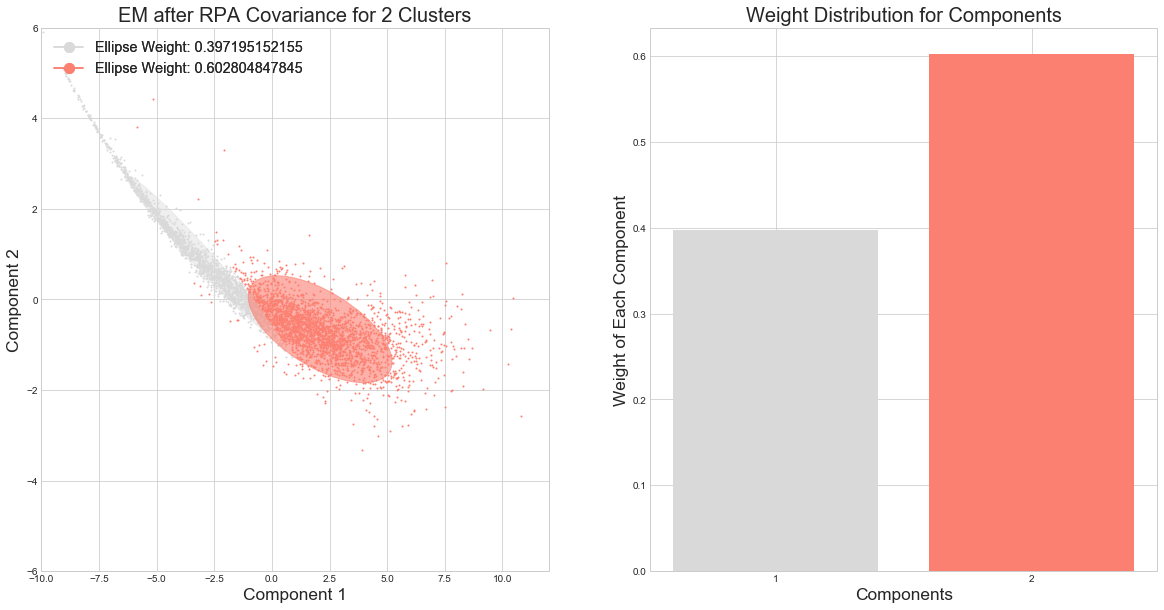

In [180]:
plot_em_covariances('EM after RPA Covariance for 2 Clusters', '2_rpa', 'Component 1', 
                    'Component 2', 2, avocado_RPA[1], em_rpa_learner, [-10,12], [-6,6])

3
(2737, 3)
(167, 3)
(1273, 3)


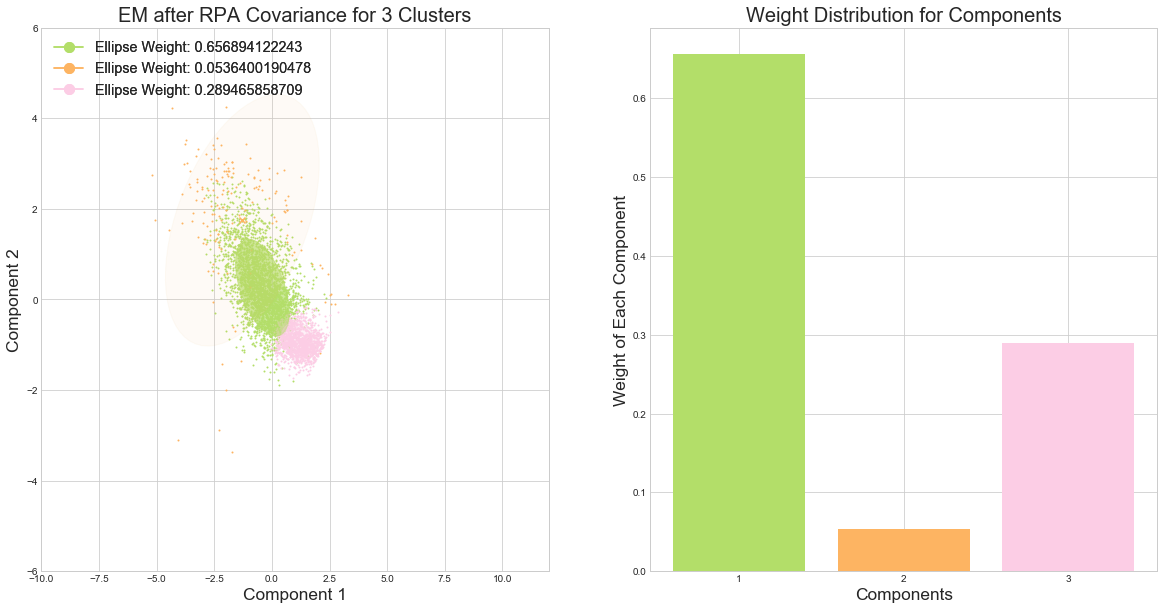

In [186]:
plot_em_covariances('EM after RPA Covariance for 3 Clusters', '3_rpa', 'Component 1', 
                    'Component 2', 3, avocado_RPA[2], em_rpa_learner, [-10,12], [-6,6])

In [187]:
em_rpa_ss

[-2.144395307813488,
 -3.291705587251502,
 -2.926019640210027,
 -4.325235805341795,
 -2.6662726569211648,
 -1.825001509279535]

In [188]:
em_rpa_converged

[True, True, True, True, True, True]

### __[ LDA- Linear Discriminant Analysis](http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html)__

#### LDA

In [215]:
%%time
# Initialize prediction results
LDA_classes = []
LDA_exp_var_rat = []
LDA_means = []
LDA_xbar = []
LDA_ss = []
LDA_success = []
LDA_covariance = []

avocado_LDA = []

# LDA
for i in range(1,6,1):
    # run lda
    print("components: "+str(i))
    lda = LinearDiscriminantAnalysis(n_components=i, store_covariance=True)

    lda.fit(ab_data_enc,ab_labels_enc)

    avocado_LDA.append(lda.transform(ab_data_enc))
    LDA_ss.append(lda.score(ab_data_enc, ab_labels_enc, None))
    LDA_classes.append(lda.classes_)
    LDA_covariance.append(lda.covariance_)
    LDA_exp_var_rat.append(lda.explained_variance_ratio_)
    LDA_means.append(lda.means_)
    LDA_xbar.append(lda.xbar_)

    # Fit data with Cross-Validation
    # scores = cross_val_score(lda, avocado_enc, None, cv=fold)
    # LDA_success.append(scores.mean())


components: 1
components: 2
components: 3
components: 4
components: 5
CPU times: user 195 ms, sys: 12.1 ms, total: 208 ms
Wall time: 59.1 ms


In [216]:
LDA_ss

[0.5491979889873114,
 0.5491979889873114,
 0.5491979889873114,
 0.5491979889873114,
 0.5491979889873114]

In [217]:
LDA_exp_var_rat

[array([0.98360925]),
 array([0.98360925, 0.01639075]),
 array([0.98360925, 0.01639075]),
 array([0.98360925, 0.01639075]),
 array([0.98360925, 0.01639075])]

In [218]:
avocado_LDA[1].shape

(4177, 2)

In [219]:
LDA_covariance

[array([[0.69222095, 0.67174142, 0.53764875, 0.61497612, 0.60865257,
         0.59292327, 0.59250001, 0.31297737],
        [0.67174142, 0.67746216, 0.53689524, 0.60784594, 0.59711276,
         0.58229241, 0.59289586, 0.32513163],
        [0.53764875, 0.53689524, 0.72686532, 0.52707729, 0.5027747 ,
         0.50626829, 0.5298646 , 0.32783102],
        [0.61497612, 0.60784594, 0.52707729, 0.68696354, 0.67730025,
         0.6536916 , 0.64765116, 0.29475404],
        [0.60865257, 0.59711276, 0.5027747 , 0.67730025, 0.72708044,
         0.64038466, 0.5957449 , 0.19200462],
        [0.59292327, 0.58229241, 0.50626829, 0.6536916 , 0.64038466,
         0.68755446, 0.60015084, 0.25826942],
        [0.59250001, 0.59289586, 0.5298646 , 0.64765116, 0.5957449 ,
         0.60015084, 0.69734559, 0.38587543],
        [0.31297737, 0.32513163, 0.32783102, 0.29475404, 0.19200462,
         0.25826942, 0.38587543, 0.80693413]]),
 array([[0.69222095, 0.67174142, 0.53764875, 0.61497612, 0.60865257,
         

#### kmeans after LDA

In [221]:
%%time
# Initialize prediction results
km_lda_ss = []
km_lda_s = []
km_lda_cm = []
km_lda_l = []
km_lda_i = []

# run learner
km_lda_learner = run_kmeans(5)

# run kmeans and record results
for i in range(0,len(km_lda_learner)):
    # fit the data
    km_lda_learner[i].fit(avocado_LDA[i],None)
    km_lda_ss.append(km_lda_learner[i].score(avocado_LDA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_lda_cm.append(km_lda_learner[i].cluster_centers_)
    km_lda_i.append(km_lda_learner[i].inertia_)
    km_lda_l.append(km_lda_learner[i].labels_)

    # fit data with Cross-Validation
    scores = cross_val_score(km_lda_learner[i], avocado_LDA[i], None, cv=fold)
    km_lda_s.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
CPU times: user 18.5 s, sys: 950 ms, total: 19.5 s
Wall time: 5.26 s


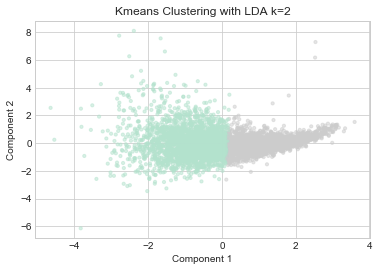

In [265]:
plotScatter('Kmeans Clustering with LDA k=2', 'lda_km_1', 'Component 1', 
            'Component 2', avocado_LDA[1][:,0], avocado_LDA[1][:,1], km_lda_l[1], plt.cm.Pastel2)

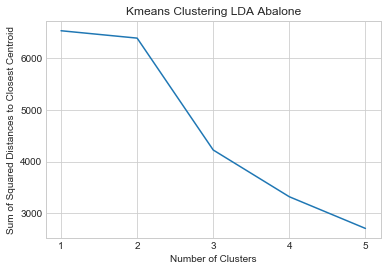

In [225]:
plotLinePlot('Kmeans Clustering LDA Abalone', 'lda_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,6,1), km_lda_i)

#### EM after LDA

In [226]:
%%time
# initialize arrays
em_lda_covariances = []
em_lda_converged = []
em_lda_means = []
em_lda_precision = []
em_lda_success = []
em_lda_ss = []
em_lda_weights = []
em_lda_Y_ = []

# run learner
em_lda_learner = run_expectation_max(5)

for i in range(0,len(em_lda_learner)):
    # fit the data
    em_lda_learner[i].fit(avocado_LDA[i],None)
    em_lda_ss.append(em_lda_learner[i].score(avocado_LDA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_lda_converged.append(em_lda_learner[i].converged_)
    em_lda_covariances.append(em_lda_learner[i].covariances_) # n_components
    em_lda_means.append(em_lda_learner[i].means_)
    em_lda_precision.append(em_lda_learner[i].precisions_)
    em_lda_weights.append(em_lda_learner[i].weights_) # n_components
    em_lda_Y_.append(em_lda_learner[i].predict(avocado_LDA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_lda_learner[i], avocado_LDA[i], None, cv=fold)
    em_lda_success.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
CPU times: user 8.2 s, sys: 429 ms, total: 8.63 s
Wall time: 2.29 s


2
(1964, 2)
(2213, 2)


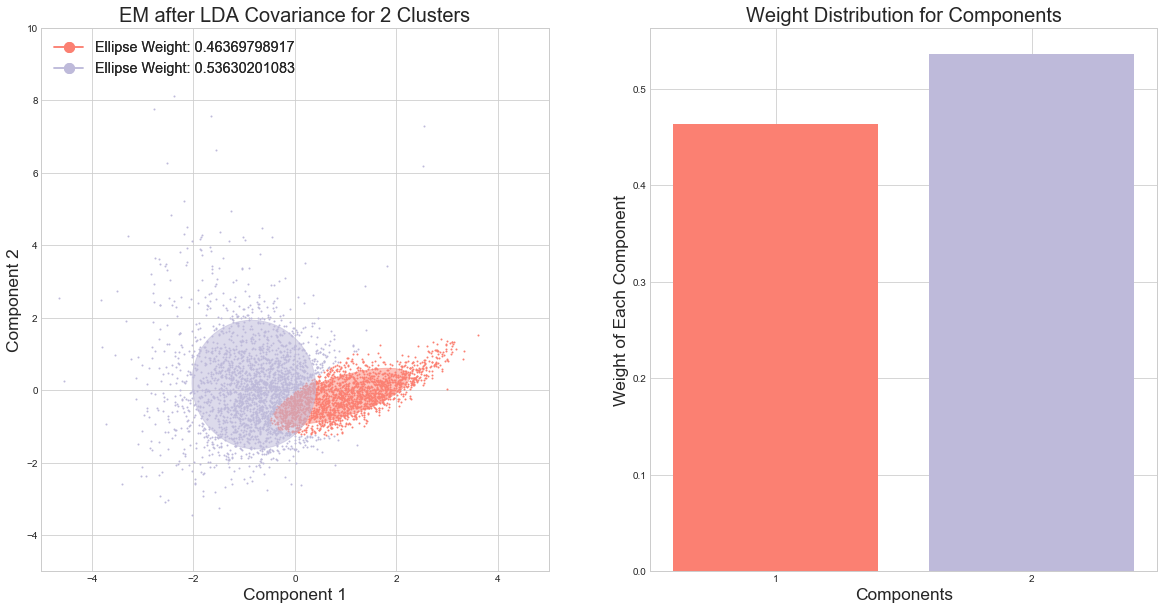

In [266]:
plot_em_covariances('EM after LDA Covariance for 2 Clusters', '1_lda', 'Component 1', 
                    'Component 2', 2, avocado_LDA[1], em_lda_learner, [-5,5],[-5,10])

In [234]:
em_lda_ss

[-1.641893617187805,
 -2.8451293769326162,
 -2.7919106315060067,
 -2.77409805720624,
 -2.7668817210139895]

In [235]:
em_lda_converged

[True, True, True, True, True]

### Neural Network

#### Clustered Data
    - Kmeans
    - Expectaion Maximization

#### I.) Kmeans

In [238]:
nn_kmeans_ss = []
nn_kmeans_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(ab_data_enc[2], ab_data_enc)
nn_ica_ss.append(clf.score(ab_data_enc, ab_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, ab_data_enc, ab_labels_enc, cv=fold)
nn_ica_s.append(scores.mean())

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.21659075  0.62602042  0.25067161  0.13920787  0.0794485   0.0310799
  0.36763136 -0.28962385].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### II.) Expectation Maximization

In [ ]:
nn_em_ss = []
nn_em_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_PCA[2], avocado_labels_enc)
nn_em_ss.append(clf.score(avocado_ICA[2], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_ICA[2], avocado_labels_enc, cv=fold)
nn_em_s.append(scores.mean())

#### Reduced Data
    - pca
    - ica
    - rpa
    - lda

#### I.) PCA

In [239]:
nn_pca_ss = []
nn_pca_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_PCA[2], ab_labels_enc)
nn_pca_ss.append(clf.score(avocado_PCA[2], ab_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_PCA[2], ab_labels_enc, cv=fold)
nn_pca_s.append(scores.mean())


#### II.) ICA

In [241]:
nn_ica_ss = []
nn_ica_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_ICA[2], ab_labels_enc)
nn_ica_ss.append(clf.score(avocado_ICA[2], ab_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_ICA[2], ab_labels_enc, cv=fold)
nn_ica_s.append(scores.mean())

#### III.) RPA

In [242]:
nn_rpa_ss = []
nn_rpa_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_RPA[2], ab_labels_enc)
nn_rpa_ss.append(clf.score(avocado_RPA[2], ab_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_RPA[2], ab_labels_enc, cv=fold)
nn_rpa_s.append(scores.mean())

#### IV.) LDA

In [243]:
nn_lda_ss = []
nn_lda_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_LDA[1], ab_labels_enc)
nn_lda_ss.append(clf.score(avocado_LDA[2], ab_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_LDA[2], ab_labels_enc, cv=fold)
nn_lda_s.append(scores.mean())

#### V.) Plot NN Results

In [244]:
nn_reduced_data = [nn_pca_s[0], nn_ica_s[0], nn_rpa_s[0], nn_lda_s[0]]
nn_red_data_alg = ['pca','ica','rpa','lda']

In [247]:
def plot_nn(title, filename, xlabel, ylabel, nn_names, nn_results):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121)
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, len(nn_names), replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    ax.bar(nn_names, nn_results, color=colors)
    ax.set_title(title, fontsize='xx-large')
    ax.set_ylabel('Success Rate', fontsize='x-large')
    ax.set_xlabel('Hidden Layer Size', fontsize='x-large')
    ax.set_ylim(0,1.0)
    ax.set_yticks(np.arange(0,1.0+.1,.1))
    
    plt.show()

    fig.savefig('outputs/abalone/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

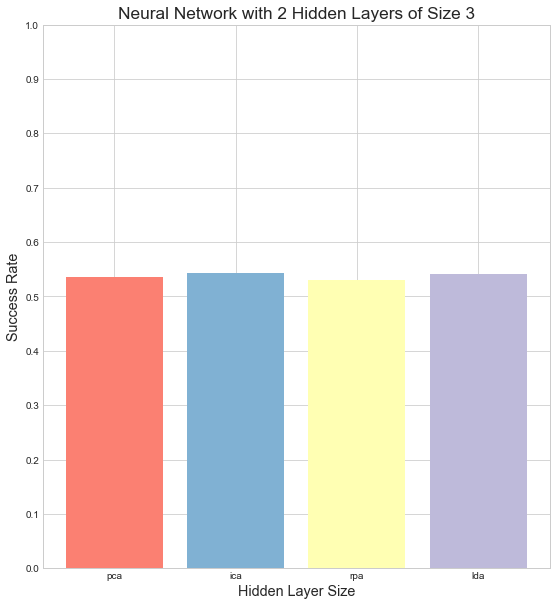

In [248]:
plot_nn('Neural Network with 2 Hidden Layers of Size 3','nn_red_data','Reduction Algo','Success Rate', nn_red_data_alg, nn_reduced_data)

http://scikit-learn.org/stable/modules/cross_validation.html

https://matplotlib.org/users/pyplot_tutorial.html

https://www.cs.helsinki.fi/u/ahyvarin/papers/NN00new.pdf

http://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf

https://blog.paperspace.com/dimension-reduction-with-independent-components-analysis/